## Visualizing Chips
The below code allows you to plot the chips you have just created. The bounding boxes are also plotted as well!

In [1]:
"""Load Packages"""
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from PIL import Image
from io import BytesIO
from matplotlib import pyplot as plt

2023-06-08 23:22:40.585113: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-08 23:22:40.647005: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-08 23:22:40.648340: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 23:22:47.686569: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [45]:
"""Directory of folder of TFRecords"""
dir_records = './image_tiles/chips/tf_records'

"""Directory of TFRecord to visualize"""
tfrecord = dir_records + '/20170830aC0952830w294630n_1_2.tfrecords'

"""Extract features"""
raw_dataset = tf.data.TFRecordDataset(tfrecord)

results = []
k = 0

for raw_record in raw_dataset:
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
    result = {}
    for key, feature in example.features.feature.items():
        kind = feature.WhichOneof('kind')
        result[key] = np.array(getattr(feature, kind).value)
    results.append(result)

# print(len(results))
print('All TFExamples extracted! On the next cell, please set n to be between 0 and %d' %(len(results) - 1))

All TFExamples extracted! On the next cell, please set n to be between 0 and 63


2023-06-09 15:09:34.206515: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]


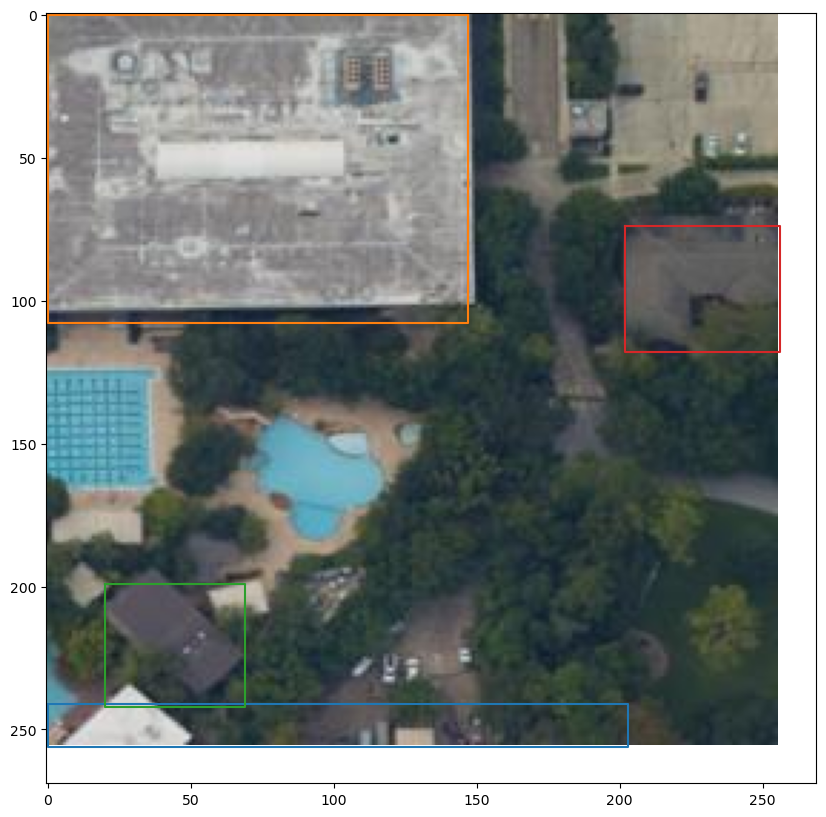

In [46]:
"""Which TFExample to plot"""
n = 20

"""Features"""
width = results[n]['image/width'][0]
height = results[n]['image/height'][0]
image = Image.open(BytesIO(results[n]['image/encoded'][0]))
xmin = results[n]['image/object/bbox/xmin'] * width
xmax = results[n]['image/object/bbox/xmax'] * width
ymin = results[n]['image/object/bbox/ymin'] * height
ymax = results[n]['image/object/bbox/ymax'] * height

"""Plot the chip and its bounding boxes"""
fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(image)
boxes = np.array([[xmin, ymin],[xmin, ymax],[xmax, ymax],[xmax, ymin],[xmin, ymin]])
plt.plot(boxes[:,0,:], boxes[:,1,:])